# Ch08.Autoencoder (Unsupervised Learning)
### : 단순히 입력을 출력으로 복사하는 신경망

In [3]:
import tensorflow as tf

In [5]:
#Tensorflow에 기본적으로 내장되어 있는 데이터를 로드
from tensorflow.examples.tutorials.mnist import input_data
# 해당 폴더에 내용이 없으면,자동으로 데이터를 다운받기
mnist=input_data.read_data_sets('C:/JupyterSpace/datasets/mnist/data',one_hot=True)

Extracting C:/JupyterSpace/datasets/mnist/data\train-images-idx3-ubyte.gz
Extracting C:/JupyterSpace/datasets/mnist/data\train-labels-idx1-ubyte.gz
Extracting C:/JupyterSpace/datasets/mnist/data\t10k-images-idx3-ubyte.gz
Extracting C:/JupyterSpace/datasets/mnist/data\t10k-labels-idx1-ubyte.gz


In [6]:
learning_rate=0.01 #최적화함수에서 사용할 학습률
training_epoch=20 #전체 데이터를 학습할 총 횟수
batch_size=100 # 한번에  학습할 데이터
n_hidden=256 #hidden layer의 뉴런 갯수
n_input=28*28 #입력값의 크기

In [7]:
X=tf.placeholder(tf.float32,[None, n_input])

In [8]:
#encoding
W_encode=tf.Variable(tf.random_normal([n_input, n_hidden])) #Weight
b_encode=tf.Variable(tf.random_normal([n_hidden]))#Bias
encoder=tf.nn.sigmoid(tf.add(tf.matmul(X,W_encode),b_encode))  #Y=aX+b

In [9]:
#decoding
W_decode=tf.Variable(tf.random_normal([n_hidden,n_input])) #Weight
b_decode=tf.Variable(tf.random_normal([n_input])) #Bias
decoder=tf.nn.sigmoid(tf.add(tf.matmul(encoder,W_decode),b_decode))  #Y=aX+b

In [11]:
cost=tf.reduce_mean(tf.pow(X-decoder,2))
optimizer=tf.train.RMSPropOptimizer(learning_rate).minimize(cost)

In [12]:
init=tf.global_variables_initializer()
sess=tf.Session()
sess.run(init)

In [13]:
total_batch=int(mnist.train.num_examples/batch_size)

In [14]:
#epoch:학습 데이터를 전체를 한번 수행하는 것
for epoch in range(training_epoch):
    total_cost=0
    
    for i in range(total_batch):
        #지정한 크기만큼 학습데이터를 가져오기
        batch_xs, batch_ys =mnist.train.next_batch(batch_size)
        _, cost_val=sess.run([optimizer, cost],feed_dict={X:batch_xs})
        total_cost += cost_val
        
    print("Epoch:", '%04d' % (epoch+1), 'Avg.Cost= ','{:.3f}'.format(total_cost/total_batch))
print('최적화 완료')

Epoch: 0001 Avg.Cost=  0.197
Epoch: 0002 Avg.Cost=  0.059
Epoch: 0003 Avg.Cost=  0.050
Epoch: 0004 Avg.Cost=  0.044
Epoch: 0005 Avg.Cost=  0.041
Epoch: 0006 Avg.Cost=  0.037
Epoch: 0007 Avg.Cost=  0.035
Epoch: 0008 Avg.Cost=  0.034
Epoch: 0009 Avg.Cost=  0.033
Epoch: 0010 Avg.Cost=  0.033
Epoch: 0011 Avg.Cost=  0.032
Epoch: 0012 Avg.Cost=  0.032
Epoch: 0013 Avg.Cost=  0.031
Epoch: 0014 Avg.Cost=  0.031
Epoch: 0015 Avg.Cost=  0.031
Epoch: 0016 Avg.Cost=  0.031
Epoch: 0017 Avg.Cost=  0.029
Epoch: 0018 Avg.Cost=  0.029
Epoch: 0019 Avg.Cost=  0.028
Epoch: 0020 Avg.Cost=  0.028
최적화 완료


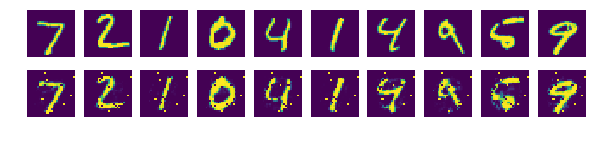

In [17]:
import numpy as np
import matplotlib.pyplot as plt
sample_size=10
samples=sess.run(decoder, feed_dict={X:mnist.test.images[:sample_size]})
fig, ax= plt.subplots(2, sample_size,figsize=(sample_size,2))
for i in range(sample_size):
    ax[0][i].set_axis_off()
    ax[1][i].set_axis_off()
    ax[0][i].imshow(np.reshape(mnist.test.images[i],(28,28)))
    ax[1][i].imshow(np.reshape(samples[i],(28,28)))

plt.show()